<a href="https://colab.research.google.com/github/PeaceIdahor/Projects/blob/main/371H_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
ECE 371H Project: Machine Learning Security
This project trains a deep learning model and attempts to defeat it using manipulated images

Code from: https://github.com/DeepranjanG/Traffic_sign_classfication

Authors: Peace Idahor, Akshat Sahay
"""

# Mounting Drive and importing TF

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
Root = "/content/drive/My Drive/Traffic_sign/TSF/Traffic_sign_classification"
os.chdir(Root)
!ls

Meta	  model.h5	  output  Test.csv  Train.csv
Meta.csv  modified_image  Test	  Train


In [3]:
%tensorflow_version 2.x

# Importing required packages for the neural network, data and visualization

In [4]:
import numpy as np
import pandas as pd
import csv
import os
import cv2
import matplotlib.pyplot as plt
!pip install Keras-Applications
import tensorflow as tf
from tensorflow import keras
from PIL import Image, ImageEnhance
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from google.colab import output 

# Use fivethiryeight style from matplotlib
from matplotlib import style
style.use('fivethirtyeight')

# Generate random seed for numpy
np.random.seed(42)

     |████████████████████████████████| 50 kB 3.0 MB/s 


# Assigning path for dataset


In [5]:
data_dir = "/content/drive/My Drive/Traffic_sign/TSF/Traffic_sign_classification"
!ls  # print contents of directory 
train_path = 'Train'
test_path = 'Test'
# Resizing the images to 30x30x3
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

Meta	  model.h5	  output  Test.csv  Train.csv
Meta.csv  modified_image  Test	  Train


# Finding total path and generating classes for labels


In [6]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [7]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

# Visualizing the dataset

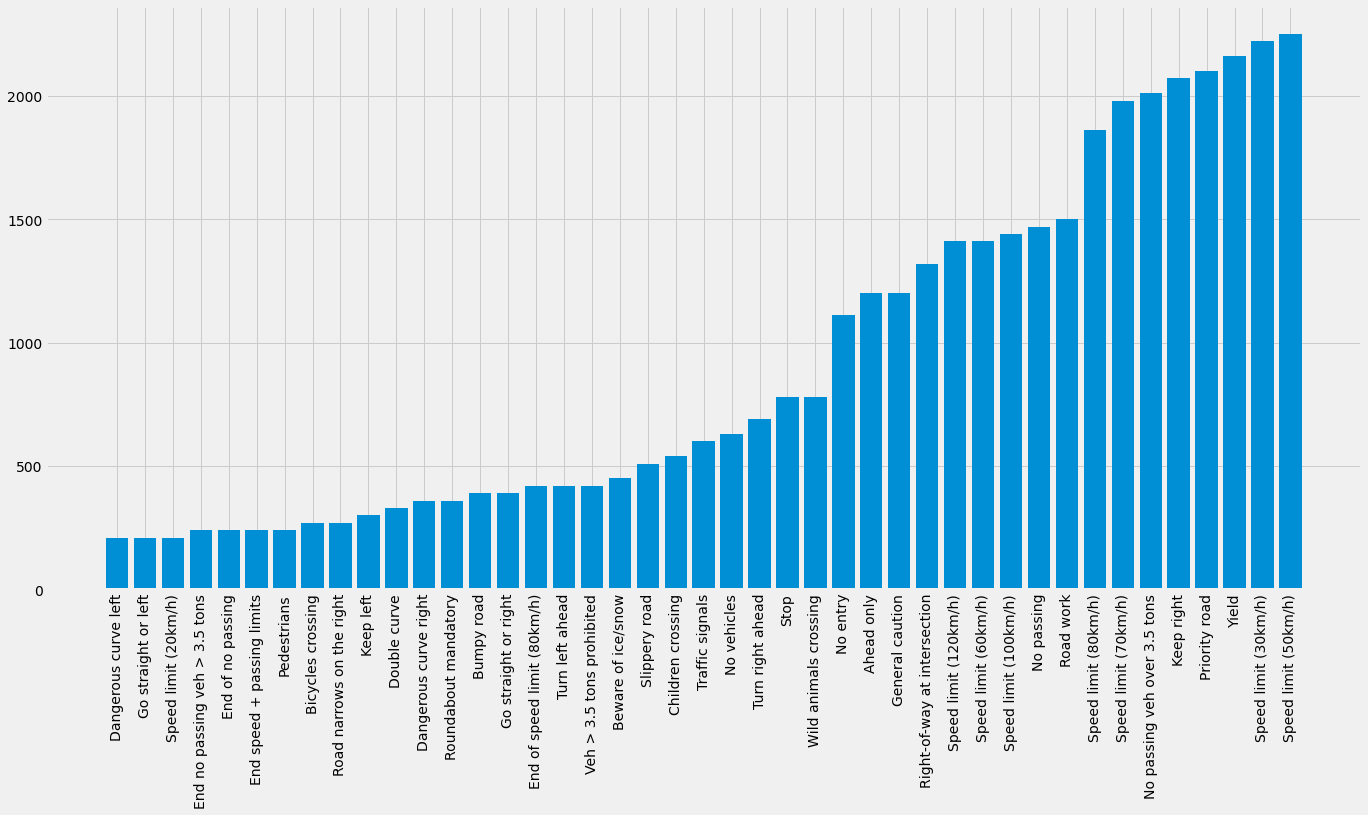

In [8]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    
# Sorting the dataset on the basis of number of images in each class
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting the number of images in each class
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

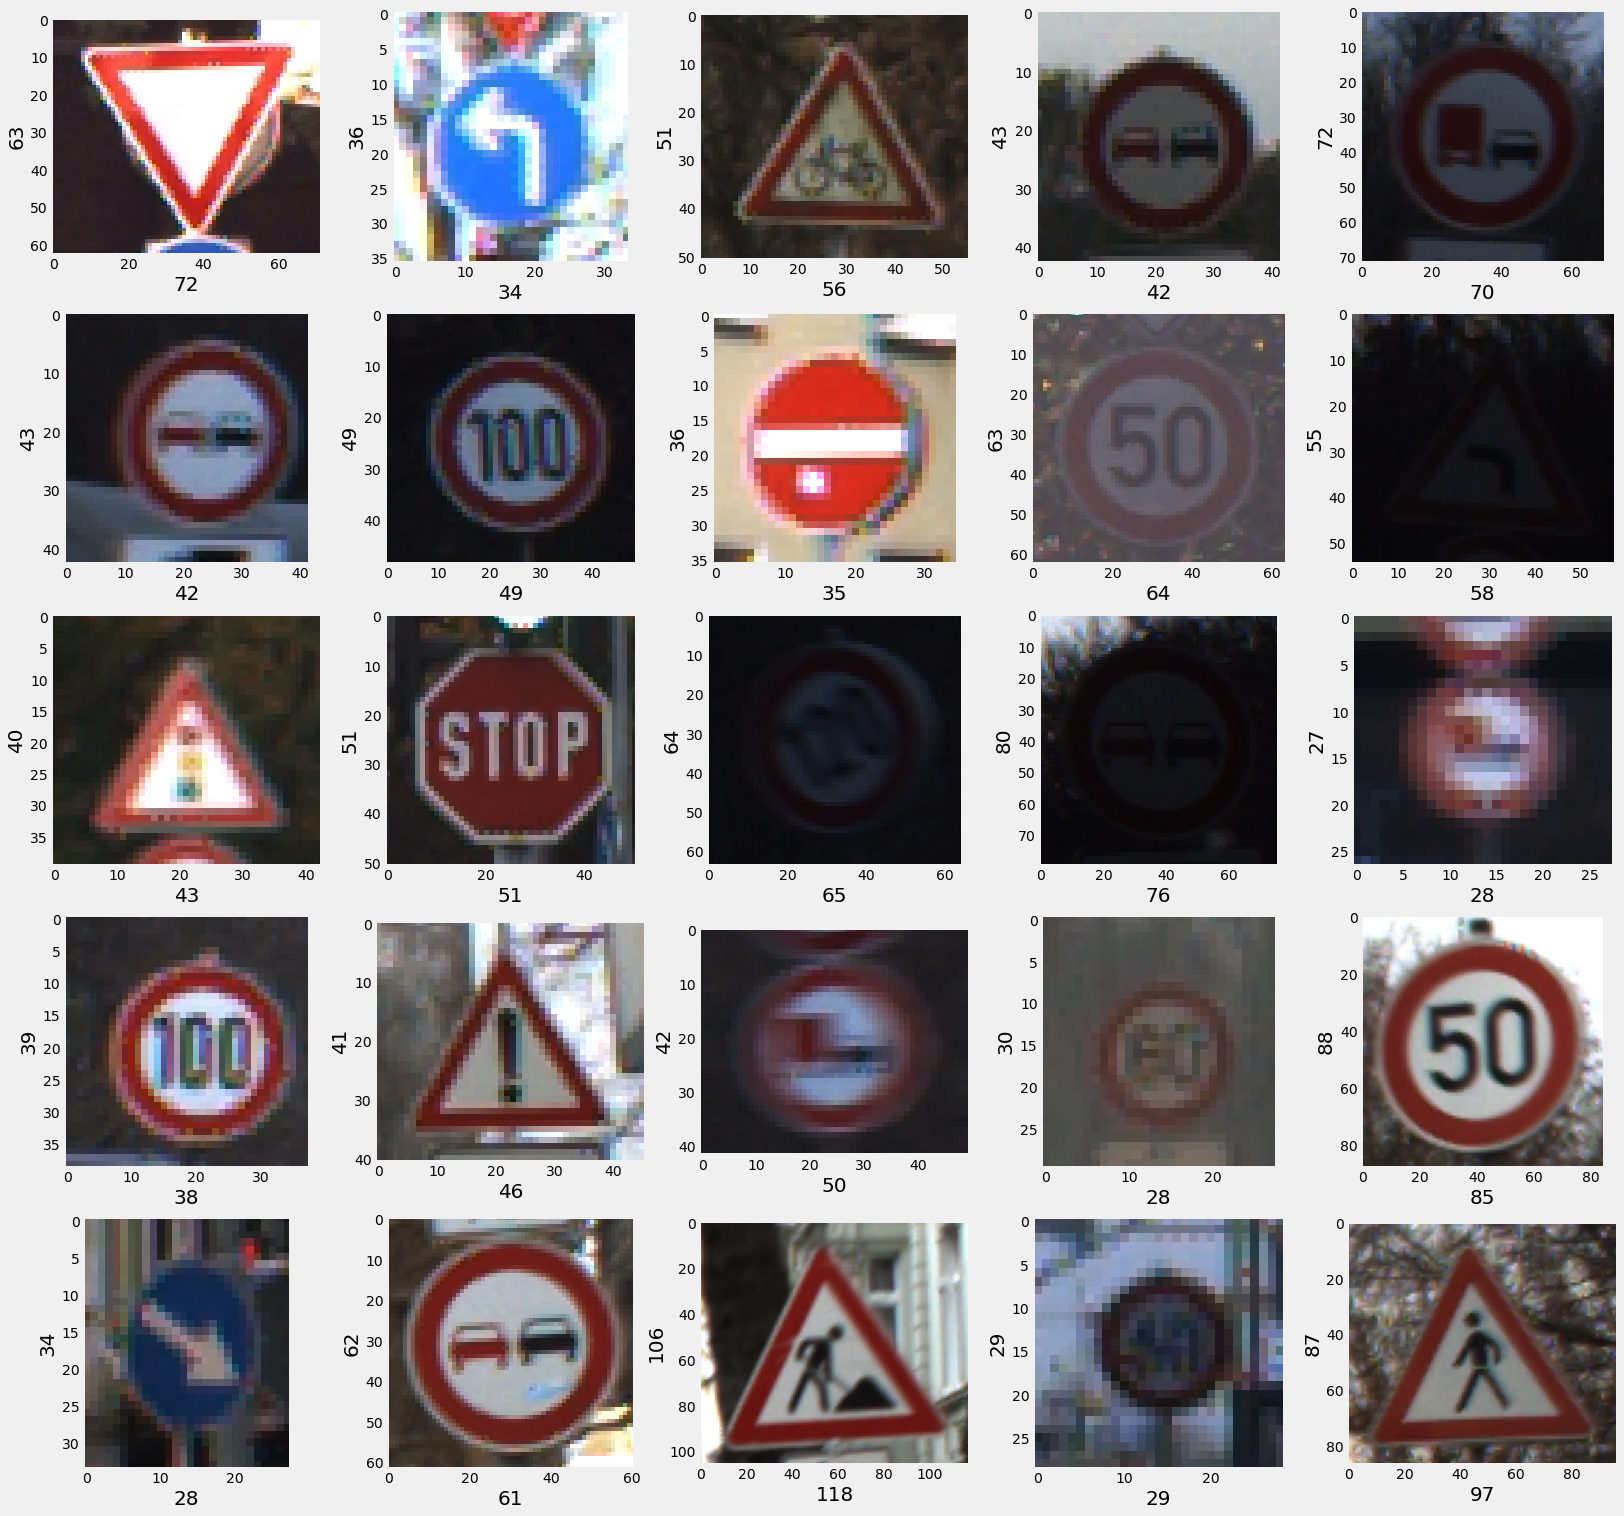

In [9]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)  #width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)  #height of image

# Collecting the training data

In [ ]:
image_data = []
image_labels = []

counter = 0

# Collecting training data from Train
for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            print("Fetching image", counter)
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
            counter = counter + 1
        except:
            print("Error in " + img)
            counter = counter + 1

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

Fetching image 0
Fetching image 1
Fetching image 2
Fetching image 3
Fetching image 4
Fetching image 5
Fetching image 6
Fetching image 7
Fetching image 8
Fetching image 9
Fetching image 10
Fetching image 11
Fetching image 12
Fetching image 13
Fetching image 14
Fetching image 15
Fetching image 16
Fetching image 17
Fetching image 18
Fetching image 19
Fetching image 20
Fetching image 21
Fetching image 22
Fetching image 23
Fetching image 24
Fetching image 25
Fetching image 26
Fetching image 27
Fetching image 28
Fetching image 29
Fetching image 30
Fetching image 31
Fetching image 32
Fetching image 33
Fetching image 34
Fetching image 35
Fetching image 36
Fetching image 37
Fetching image 38
Fetching image 39
Fetching image 40
Fetching image 41
Fetching image 42
Fetching image 43
Fetching image 44
Fetching image 45
Fetching image 46
Fetching image 47
Fetching image 48
Fetching image 49
Fetching image 50
Fetching image 51
Fetching image 52
Fetching image 53
Fetching image 54
Fetching image 55
Fe

# Shuffling the training data

In [ ]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

# Splitting the data into training and validation sets

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

# Printing shapes of training data and validation sets 
print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

# Encoding the labels

In [ ]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

# Making the model

In [ ]:
# Training model in Keras 
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(axis=-1),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(rate=0.5),
    
    keras.layers.Dense(43, activation='softmax')
])

In [ ]:
lr = 0.001
epochs = 30

opt = Adam(lr=lr, decay=lr / (epochs * 0.5))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Augmenting the data and training the model

In [ ]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

history = model.fit(aug.flow(X_train, y_train, batch_size=32), epochs=epochs, validation_data=(X_val, y_val))

In [ ]:
model.save("model.h5")

In [ ]:
model.save_weights("/content/drive/MyDrive/Colab_Notebook/TSF/Traffic_sign_classification/output")

# Evaluating the model

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Loading unmodified test data and running the predictions

In [ ]:
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]
count = 0

# Loading test data from Test
for img in imgs:
    try:
        print("Fetching image", count)
        image = cv2.imread(data_dir + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
        data.append(np.array(resize_image))
        count += 1
    except:
        print("Error in " + img)
        count += 1
X_test = np.array(data)
X_test = X_test/255

pred_x = model.predict(X_test)
pred = np.argmax(pred_x, axis=1)

# Accuracy with the test data
print('Test Data accuracy: ', accuracy_score(labels, pred) * 100)

# Printing classification report

In [ ]:
# Print classification report 
from sklearn.metrics import classification_report
print(classification_report(labels, pred))

# Visualizing the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(labels, pred)

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

# Predictions on text data

In [ ]:
plt.figure(figsize = (25, 25))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

# Testing with modified images

In [ ]:
# Testing model with manipulated images
import random

test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]
count = 0

# Loading subset of test data and modifying images
for img in imgs:
    print("Fetching image", count)
    image = Image.open(data_dir + '/' +img)
    choice = 1

    if(choice == 0):
        # Modifying image brightness
        print("Modifying brightness")
        bright_mod = ImageEnhance.Brightness(image)
        rand_bright = random.randint(0, 2)
        image = bright_mod.enhance(rand_bright)

    if(choice == 1):
        # Modifying image rotation
        print("Modifying rotation")
        rand_rot = random.randint(1, 3)
        image = image.rotate(90*rand_rot, expand = True)

    # Converting image to OpenCV format 
    image_cv = np.array(image) 
    image_fromarray = Image.fromarray(image_cv, 'RGB')
    resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
    data.append(np.array(resize_image))

    count += 1

X_test = np.array(data)
X_test = X_test/255

pred_x_mod = model.predict(X_test)
pred_mod   = np.argmax(pred_x_mod, axis=1)

# Accuracy with the test data
print('Test Data accuracy: ', accuracy_score(labels, pred_mod) * 100)

In [ ]:
# Print new classification report 
print(classification_report(labels, pred_mod))

In [ ]:
# Print new confusion matrix 
cf = confusion_matrix(labels, pred_mod)

df_cm = pd.DataFrame(cf, index = classes,  columns = classes)
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)